In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h1><b>1. Data Collecting

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CrabAgePrediction.csv')

<h1><b> 2. Peninjauan Informasi Umum Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [ ]:
print('Nilai Yang Hilang Per Fitur')
print(data.isnull().sum())

Nilai Yang Hilang Per Fitur
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


<h1><b>3. One Hot Encoding Fitur Sex

In [4]:
data = pd.get_dummies(data, columns=['Sex'], dtype='int')
data.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


<h1><b> 4. EDA

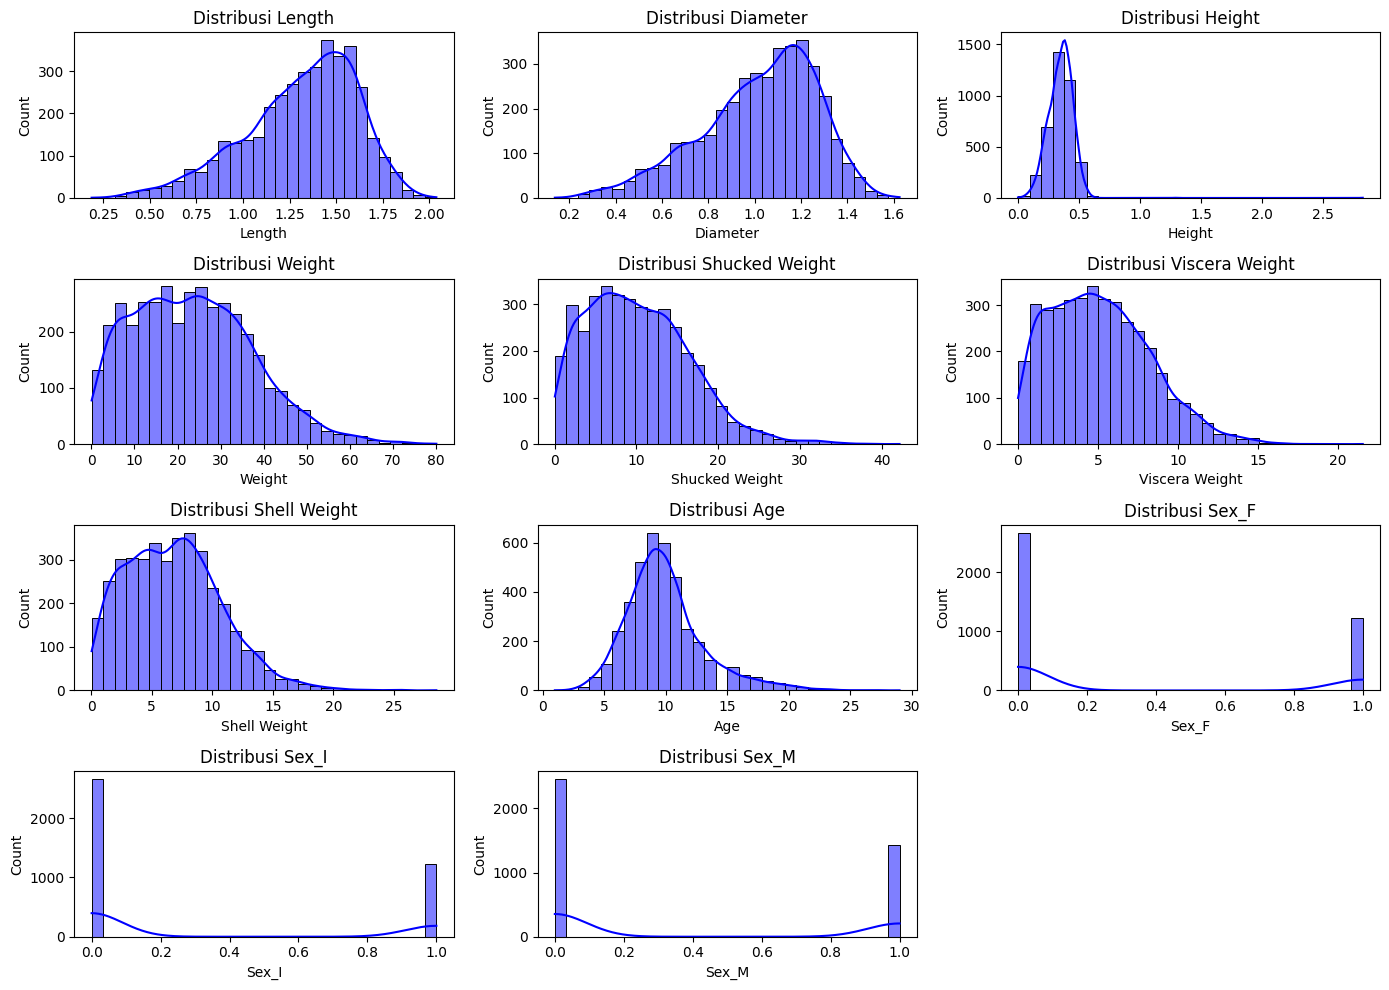

In [ ]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


<Axes: >

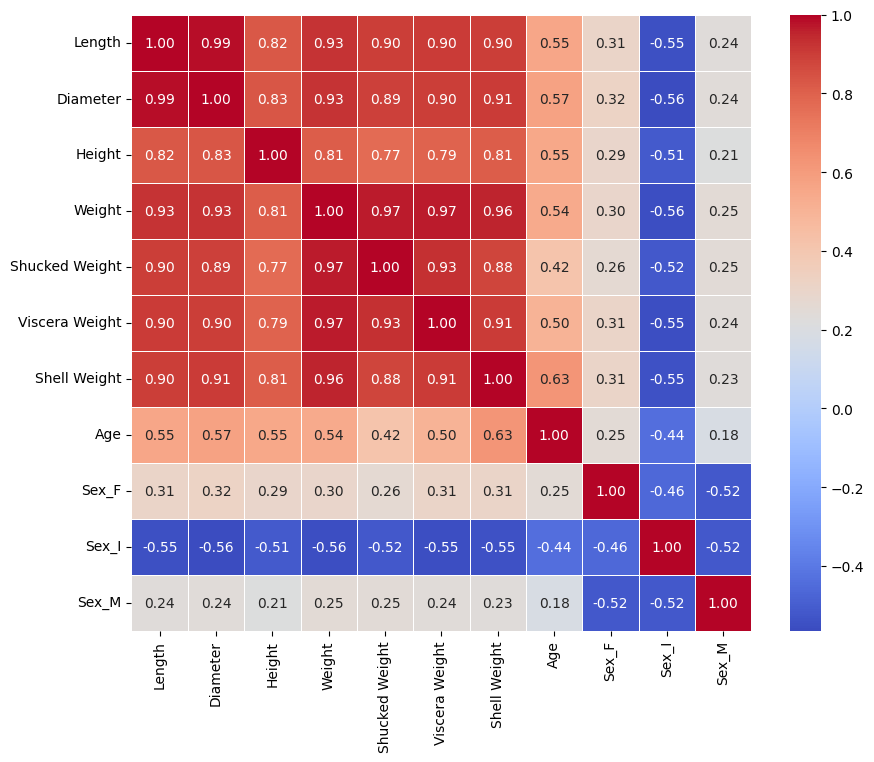

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

<h1><b>5. Pembagian Dataset

In [5]:
dataset = data.drop('Age', axis=1)
x_train, x_test, y_train, y_test = train_test_split(dataset, data['Age'], test_size=0.2, random_state=1)

# <h1><b>6 Data Preprocess : Normalisasi Fitur Data dan Label

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler_fiturData = MinMaxScaler()
scaler_labelData = MinMaxScaler()

x_latih = scaler_fiturData.fit_transform(x_train)
x_uji = scaler_fiturData.transform(x_test)

y_latih = scaler_labelData.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_uji = scaler_labelData.transform(y_test.to_numpy().reshape(-1, 1))

<h1><b> 7. Modelling : Membangun Model

In [8]:
class SimpleNeuralNetwork:
    def __init__(self, learning_rate=0.01, epochs=100, random=1):

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.bobot = None
        self.bias = None
        np.random.seed(random)

    def train(self, x_latih, y_latih):

        # Inisialisasi bobot dan bias
        self.bobot = np.random.randn(x_latih.shape[1], 1)  # Bobot untuk jumlah fitur input
        self.bias = np.zeros((1, 1))  # Bias scalar

        # Pelatihan untuk jumlah epoch yang ditentukan
        for epoch in range(self.epochs):
            # Forward pass: Perkalian bobot dan input, ditambah bias
            output = np.dot(x_latih, self.bobot) + self.bias

            # Hitung error (selisih prediksi dengan target)
            error = y_latih - output

            # Backpropagation: Gradien dari error terhadap bobot dan bias
            d_weights = -2 * np.dot(x_latih.T, error) / x_latih.shape[0]
            d_bias = -2 * np.sum(error) / x_latih.shape[0]

            # Update bobot dan bias menggunakan gradien descent
            self.bobot -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def evaluate(self, x_uji, y_uji):
        prediksi = np.dot(x_uji, self.bobot) + self.bias
        mae = mean_absolute_error(y_uji, prediksi)
        mse = mean_squared_error(y_uji, prediksi)
        r2 = r2_score(y_uji, prediksi)
        return mae, mse, r2

    def predict(self, x_input):

        if self.bobot is None or self.bias is None:
            raise ValueError("Model belum dilatih. Gunakan metode 'train' terlebih dahulu.")

        return np.dot(x_input, self.bobot) + self.bias


<h1><b>8. Tuning Hyperparameter

In [ ]:
def hyperparameter_tuning(x_latih, y_latih, x_uji, y_uji, learning_rate_range, epochs_range):
    results = []

    for lr in learning_rate_range:
        for epoch in epochs_range:
            # Membuat model baru untuk setiap kombinasi hyperparameter
            model = SimpleNeuralNetwork(learning_rate=lr, epochs=epoch, random=42)

            # Melatih model
            model.train(x_latih, y_latih)

            # Evaluasi model
            mae, mse, r2 = model.evaluate(x_uji, y_uji)

            # Menyimpan hasil evaluasi
            results.append({
                'Learning Rate': lr,
                'Epochs': epoch,
                'MAE': mae,
                'MSE': mse,
                'R²': r2
            })

    return pd.DataFrame(results)


In [ ]:
hasil_terbaik = hyperparameter_tuning(x_latih, y_latih, x_uji, y_uji, [0.001, 0.01, 0.1], [1000, 2000, 3000, 10000, 20000, 30000, 40000, 100000, 200000, 300000, 1000000, 2000000, 3000000])
best_result = hasil_terbaik.loc[hasil_terbaik['R²'].idxmax()]
print("Kombinasi Hyperparameter Terbaik:")
print(best_result)

,Learning Rate,Epochs,MAE,MSE,R²
0,0.001,1000,0.312841,0.138329,-8.811380
1,0.001,2000,0.185438,0.050242,-2.563516
2,0.001,3000,0.127944,0.026333,-0.867739
3,0.001,10000,0.074927,0.011629,0.175198
4,0.001,20000,0.069823,0.009837,0.302277
5,0.001,30000,0.068616,0.009359,0.336222
6,0.001,40000,0.067678,0.009047,0.358348
7,0.001,100000,0.063381,0.007885,0.440727
8,0.001,200000,0.060266,0.007075,0.498217
9,0.001,300000,0.059176,0.006745,0.521610


<h1><b> 9. Training Model

In [9]:
model_jst = SimpleNeuralNetwork(learning_rate=0.1, epochs=30000, random=42)
model_jst.train(x_latih,y_latih)

<h1><b> Membandingkan Dengan Regresi Linear

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Inisialisasi dan latih model Linear Regression
lr = LinearRegression()
lr.fit(x_latih, y_latih)

y_pred = lr.predict(x_uji)


mae = mean_absolute_error(y_uji, y_pred)
mse = mean_squared_error(y_uji, y_pred)
r2 = r2_score(y_uji, y_pred)

joblib.dump(lr, '/content/drive/MyDrive/Machine Learning/model_lr')

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

MAE: 0.0575767872519471
MSE: 0.006342394536443315
R²: 0.5501490170903589


<h1><b> Menggunakan JST

In [ ]:
x_latih

array([[0.64539007, 0.55357143, 0.11504425, ..., 1.        , 0.        ,
        0.        ],
       [0.42553191, 0.41964286, 0.08849558, ..., 0.        , 1.        ,
        0.        ],
       [0.5248227 , 0.51785714, 0.11946903, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.62411348, 0.60714286, 0.13274336, ..., 1.        , 0.        ,
        0.        ],
       [0.46808511, 0.45535714, 0.10176991, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.32142857, 0.09734513, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
model = SimpleNeuralNetwork(learning_rate=0.1, epochs=30000, random=42)
inputan_pengguna = [1.4375, 1.175, 0.4125, 24.6357155, 12.3320325, 5.5848515, 6.747181, 1, 0, 0]
inputan_pengguna_normalisasi = scaler_fiturData.transform([inputan_pengguna])
model.train(x_latih,y_latih)
hasil = model.predict(inputan_pengguna_normalisasi)
print("Hasil Prediksi:", scaler_labelData.inverse_transform(hasil))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Hasil Prediksi: [[9.80163487]]


<h1><b> Extraksi Model

In [33]:
joblib.dump(model_jst, '/content/drive/MyDrive/Machine Learning/pengetahuan')
joblib.dump(scaler_fiturData, '/content/drive/MyDrive/Machine Learning/scaler_fiturData')
joblib.dump(scaler_labelData, '/content/drive/MyDrive/Machine Learning/scaler_labelData')
joblib.dump(SimpleNeuralNetwork, '/content/drive/MyDrive/Machine Learning//KELAZZ')

['/content/drive/MyDrive/Machine Learning//KELAZZ']

In [11]:
inputan_pengguna = [0.4375, 1.175, 5.4125, 24.6357155, 12.3320325, 5.5848515, 6.747181, 1, 0, 0]
inputan_pengguna_normalisasi = scaler_fiturData.transform([inputan_pengguna])
modelYangDisimpan = joblib.load('/content/drive/MyDrive/Machine Learning/pengetahuan')
Hasil = modelYangDisimpan.predict(inputan_pengguna_normalisasi)
print('Hasil : ', scaler_labelData.inverse_transform(Hasil))

Hasil :  [[28.81087443]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
